<a href="https://colab.research.google.com/github/vishalkotwal/Sentiment-analysis-/blob/master/Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv("moviereviews.csv")

#Movie review dataset

In [8]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#MovieReview analysis

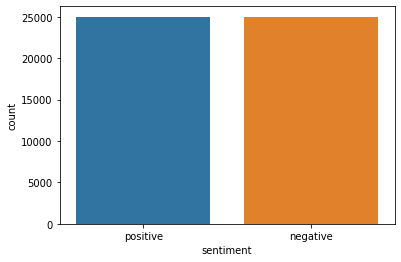

In [10]:
sns.countplot(x = "sentiment",data = df)

# Therefore The data is not biased

In [11]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Get dumbies for whether the review is positive or negative

In [12]:
df['review'] = df['review'].fillna(' ')
x = df.iloc[:,0].values

#splitting tha dataset

In [13]:
df['binary'] = 1
df.loc[df['sentiment'] =="negative","binary"] =0
df.loc[df['sentiment']=="positive", 'binary'] = 1
y = df.iloc[:,2].values
y

array([1, 1, 1, ..., 0, 0, 0])

##splittng the dataset into train,test

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [15]:
x_train.shape

(35000,)

# Implementing sentiment analysis


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Implementing countvector on train and test data

In [17]:
#count_vector = CountVectorizer(binary= True)
#x_train_counts = count_vector.fit_transform(x_train)
#x_test_counts = count_vector.transform(x_test)

# Get tf values for count_vector(train and test)

Train_data

In [18]:
#from sklearn.feature_extraction.text import TfidfTransformer
#tf_transformer = TfidfTransformer(use_idf=False).fit(x_train_counts)
#x_train_tf = tf_transformer.transform(x_train_counts)
#x_train_tf.shape

Test_data

In [19]:

#tf_test_transformer  = TfidfTransformer(use_idf=False).fit(x_test_counts)
#x_test_tf = tf_test_transformer.transform(x_test_counts)
#x_test_tf.shape

# Applying TFIDF values on TF(train and test)

Train_data

In [20]:
#tfidf_transform = TfidfTransformer()
#x_train_tfidf = tfidf_transform.fit_transform(x_train_counts)
#x_train_tfidf.shape

Test_data

In [21]:
#test_tfidf_transform = TfidfTransformer()
#x_test_tfidf = test_tfidf_transform.fit_transform(x_test_counts)
#x_test_tfidf.shape

#Applying MultinomialNGB on train_tfidf values

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
Multimodel = Pipeline([('tfidf',TfidfVectorizer(binary = True,max_df=0.611111111111111,norm = 'l2')),("Multinomial",MultinomialNB(alpha = 0.3,class_prior=None, fit_prior=True))])

In [23]:
#model = MultinomialNB(alpha = 0.058,fit_prior=True)
Multimodel.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.611111111111111,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('Multinomial',
                 MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True))],
         verbo

#predicting the values 

In [24]:
y_pred = Multimodel.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0])

# Evaluating model Accuracy

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score

In [26]:
print(accuracy_score(y_pred,y_test)*100)
print(f1_score(y_test,y_pred))

86.27333333333334
0.860661839344928


In [27]:
confusion_matrix(y_pred,y_test)

array([[6582, 1101],
       [ 958, 6359]])

In [28]:
precision_score(y_test,y_pred)

0.8690720240535739

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7683
           1       0.85      0.87      0.86      7317

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [30]:
y_pred = Multimodel.predict(["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."])
y_pred

array([0])

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
tfidf = TfidfVectorizer(max_df=0.611111111111111,norm = 'l2')
tfidf_x = tfidf.fit_transform(x)

In [33]:
from sklearn.model_selection import  GridSearchCV
parameters = {'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
Model2 = MultinomialNB()
grid = GridSearchCV(Model2,parameters,cv = 10 ,scoring="f1",iid= True)
grid.fit(tfidf_x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid=True, n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [34]:
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.862549,0.004006,{'alpha': 0.1}
1,0.864096,0.003592,{'alpha': 0.2}
2,0.864748,0.003630,{'alpha': 0.3}
3,0.864514,0.003604,{'alpha': 0.4}
4,0.864449,0.003497,{'alpha': 0.5}
5,0.863918,0.003711,{'alpha': 0.6}
6,0.863750,0.003328,{'alpha': 0.7}
7,0.863333,0.003018,{'alpha': 0.8}
8,0.863061,0.002777,{'alpha': 0.9}
9,0.862961,0.003117,{'alpha': 1.0}


In [35]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.864748140482373
{'alpha': 0.3}
MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)
